# Assignment 2 - Statistical Treatment fot Retail Datasets

## Tentang Data
This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

## Isi Data
1. BOROUGH : kode digit yang menyatakan wilayah dari lokasi properti

Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5)

2. BLOCK and LOT: A Tax Block is a sub-division of the borough on which real properties are located. The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. “Whereas” addresses describe the street location of a property, the block and lot distinguishes one unit of real property from another, such as the different condominiums in a single building. Also, block and lots are not subject to name changes based on which side of the parcel the building puts its entrance on. A Tax Lot is a subdivision of a Tax Block and represents the property unique location. Because there are more than 11k unique blocks in the dataset, it doesn't make sense to define it as a categorical variable! Will leave it as numerical. The same story for LOT

3. NEIGHBORHOOD: Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included. This variable should be categorical.

4. BUILDING CLASS CATEGORY: This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class Category, Block and Lot. This variable should be categorical.

5. TAX CLASS AT PRESENT Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property. This variable should be categorical.

6. BUILDING CLASS AT PRESENT: The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class used by the Department of Finance is interchangeable with the term Building Code used by the Department of Buildings. This variable should be categorical.

7. ADDRESS: The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field. We are not going to extract any information from the address in this course!

8. ZIP CODE: The property’s postal code. This variable should be categorical.

9. RESIDENTIAL UNITS : The number of residential units at the listed property. This variable should be numeric

10. COMMERCIAL UNITS :The number of commercial units at the listed property. This variable should be numeric

11. TOTAL UNITS :The total number of units at the listed property. This variable should be numeric

12. LAND SQUARE FEET : The land area of the property listed in square feet. This variable should be numeric

13. GROSS SQUARE FEET : The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property. This variable should be numeric

14. YEAR BUILT : Year the structure on the property was built. This variable should be categorical

15. TAX CLASS AT TIME OF SALE and BUILDING CLASS AT TIME OF SALE. Both of these variables should be categorical.

16. SALE PRICE : This variable should be numeric.

17. SALE DATE : This variable should be data time. However, we can save the "year" or "month" part as a new categorical variable.

18. EASEMENT: An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property.


In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur jumlah kolom yang akan ditampilkan sepenuhnya
pd.set_option('display.max_columns', None)

# Atur lebar maksimal kolom yang ditampilkan
pd.set_option('display.max_colwidth', None)

# Jika tabel sangat panjang, atur juga jumlah baris yang ditampilkan
pd.set_option('display.max_rows', None)

In [2]:
#import dataset
df_nyc_sales = pd.read_csv('dataset/nyc-rolling-sales.csv')
df_nyc_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
for col in df_nyc_sales.columns:
    print("UNIQUE VALUES FOR ",col)
    print("="*25)
    print(df_nyc_sales[col].unique())
    print("="*25)

UNIQUE VALUES FOR  Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
UNIQUE VALUES FOR  BOROUGH
[1 2 3 4 5]
UNIQUE VALUES FOR  NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CR

### Preprocessing Data

In [4]:
#kolom pada dataset 
df_nyc_sales.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [5]:
#info masing-masing kolom (cari yg null & cari tahu type datanya)
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
df_nyc_sales.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [7]:
#we need to discover if there is any empy space or any '-' caracter
# we will count the number of the empty spaces and '-' caracter
counts_ = df_nyc_sales.applymap(lambda x: str(x).count("-"))
counts_space = df_nyc_sales.applymap(lambda x: str(x).count(" "))
print(f"there is {counts_.sum().sum()} '-' and {counts_space.sum().sum()} spaces")

/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_36036/1897899686.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts_ = df_nyc_sales.applymap(lambda x: str(x).count("-"))
/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_36036/1897899686.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts_space = df_nyc_sales.applymap(lambda x: str(x).count(" "))


there is 321133 '-' and 2491521 spaces


In [8]:
# data ada yg di isi dengan "-", data yg isinya "-" di ganti NaN, dan data yg kosong di isi oleh Null
#baca ulang dataset nya
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df_nyc_sales = pd.read_csv('dataset/nyc-rolling-sales.csv', na_values=missing_values)

In [9]:
df_nyc_sales['YEAR BUILT']=df_nyc_sales['YEAR BUILT'].replace({0:np.nan})
df_nyc_sales['ZIP CODE']=df_nyc_sales['ZIP CODE'].replace({0:np.nan})
df_nyc_sales['TOTAL UNITS']=df_nyc_sales['TOTAL UNITS'].replace({0:np.nan})

In [10]:
#buang kolom yang tidak di perlukan
#buang kolom Unnamed: 0, Address, & Apartment Number
tidak_perlu = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER']
df_nyc_sales.drop(tidak_perlu,inplace=True, axis=1)
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            83810 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   BUILDING CLASS AT PRESENT       83810 non-null  object 
 7   ZIP CODE                        83566 non-null  float64
 8   RESIDENTIAL UNITS               84548 non-null  int64  
 9   COMMERCIAL UNITS                84548 non-null  int64  
 10  TOTAL UNITS                     64786 non-null  float64
 11  LAND SQUARE FEET                58296 non-null  float64
 12  GROSS SQUARE FEET               

In [11]:
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [12]:
df_nyc_sales.head(30)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,10009.0,20,0,20.0,2581.0,9730.0,1900.0,2,C4,NaN,2017-07-20 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,8.0,1750.0,4226.0,1920.0,2,C4,3192840.0,2016-09-23 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,10009.0,44,2,46.0,5163.0,21007.0,1900.0,2,C7,NaN,2017-07-20 00:00:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,10009.0,15,0,15.0,1534.0,9198.0,1920.0,2,D5,NaN,2017-06-20 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,24.0,4489.0,18523.0,1920.0,2,D9,16232000.0,2016-11-07 00:00:00


In [13]:
#pada data yg bersifat categorical & tidak ada urutan yg jelas, bisa gantikan nilai kosong dengan Modus
categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoricals_columns:
    df_nyc_sales[cat_col].fillna(df_nyc_sales[cat_col].mode()[0],inplace=True)

In [14]:
#replace data numerik yg kosong dengan Median, median lebih tahan dengan outliers dibanding dengan mean
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    df_nyc_sales[float_col].fillna(df_nyc_sales[float_col].median(),inplace=True)

In [15]:
df_nyc_sales.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [16]:
#untuk total unit & sale price yg kosong tidak dapat di artikan jadi di buang
df_nyc_sales.dropna(inplace=True)
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52363 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52363 non-null  int64  
 1   NEIGHBORHOOD                    52363 non-null  object 
 2   BUILDING CLASS CATEGORY         52363 non-null  object 
 3   TAX CLASS AT PRESENT            52363 non-null  object 
 4   BLOCK                           52363 non-null  int64  
 5   LOT                             52363 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52363 non-null  object 
 7   ZIP CODE                        52363 non-null  float64
 8   RESIDENTIAL UNITS               52363 non-null  int64  
 9   COMMERCIAL UNITS                52363 non-null  int64  
 10  TOTAL UNITS                     52363 non-null  float64
 11  LAND SQUARE FEET                52363 non-null  float64
 12  GROSS SQUARE FEET               52363

data sudah tidak ada yg kosong & sudah di ambil kolom yg bisa di manfaatkan untuk analisa kedepan

In [17]:
#cari data yg duplikat
sum(df_nyc_sales.duplicated())

367

In [18]:
#hapus data duplikat
df_nyc_sales.drop_duplicates(subset=df_nyc_sales.columns,keep='first', inplace=True)
df_nyc_sales.head(30)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,8.0,1750.0,4226.0,1920.0,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,24.0,4489.0,18523.0,1920.0,2,D9,16232000.0,2016-11-07 00:00:00
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,10009.0,10,0,10.0,3717.0,12350.0,2009.0,2,D1,10350000.0,2016-10-17 00:00:00
22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,10009.0,24,0,24.0,4131.0,16776.0,1928.0,2,C6,11900000.0,2017-06-21 00:00:00
73,1,ALPHABET CITY,11A CONDO-RENTALS,2,385,1102,RR,10009.0,47,0,47.0,2325.0,36472.0,2005.0,2,RR,28000000.0,2016-10-13 00:00:00
75,1,ALPHABET CITY,11A CONDO-RENTALS,2,397,1301,RR,10002.0,132,0,132.0,33650.0,1680.0,1989.0,2,RR,52625000.0,2016-10-19 00:00:00
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R2,620000.0,2016-12-30 00:00:00


In [19]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51996 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51996 non-null  int64  
 1   NEIGHBORHOOD                    51996 non-null  object 
 2   BUILDING CLASS CATEGORY         51996 non-null  object 
 3   TAX CLASS AT PRESENT            51996 non-null  object 
 4   BLOCK                           51996 non-null  int64  
 5   LOT                             51996 non-null  int64  
 6   BUILDING CLASS AT PRESENT       51996 non-null  object 
 7   ZIP CODE                        51996 non-null  float64
 8   RESIDENTIAL UNITS               51996 non-null  int64  
 9   COMMERCIAL UNITS                51996 non-null  int64  
 10  TOTAL UNITS                     51996 non-null  float64
 11  LAND SQUARE FEET                51996 non-null  float64
 12  GROSS SQUARE FEET               51996

In [20]:
#ubah format tanggal pada sale date
df_nyc_sales['SALE DATE'] = pd.to_datetime(df_nyc_sales['SALE DATE'])

In [21]:
#pecah menjadi bulan & tahun
df_nyc_sales['SALE MONTH'] = df_nyc_sales['SALE DATE'].dt.month
df_nyc_sales['SALE YEAR'] = df_nyc_sales['SALE DATE'].dt.year
df_nyc_sales['SALE DAY Date'] = df_nyc_sales['SALE DATE'].dt.day
df_nyc_sales['SALE DAY'] = df_nyc_sales['SALE DATE'].dt.day_name()

In [22]:
#kolom sudah tidak di perlukan, drop saja
df_nyc_sales = df_nyc_sales.drop(columns=['SALE DATE'])
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,SALE YEAR,SALE DAY Date,SALE DAY
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,7,2017,19,Wednesday
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,9,2016,23,Friday
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,11,2016,17,Thursday
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,8.0,1750.0,4226.0,1920.0,2,C4,3192840.0,9,2016,23,Friday
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,24.0,4489.0,18523.0,1920.0,2,D9,16232000.0,11,2016,7,Monday


In [23]:
#cari data yg masih duplikat lagi
sum(df_nyc_sales.duplicated())

0

In [24]:
#lakukan drop duplikat
df_nyc_sales.drop_duplicates(subset=df_nyc_sales.columns,keep='first', inplace=True)

In [25]:
#sekarang sdh tdk ada data duplikat
sum(df_nyc_sales.duplicated())

0

In [26]:
#ubah type data sesuai dengan kondisi kolom
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('int64')

In [27]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51996 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51996 non-null  object 
 1   NEIGHBORHOOD                    51996 non-null  object 
 2   BUILDING CLASS CATEGORY         51996 non-null  object 
 3   TAX CLASS AT PRESENT            51996 non-null  object 
 4   BLOCK                           51996 non-null  int64  
 5   LOT                             51996 non-null  int64  
 6   BUILDING CLASS AT PRESENT       51996 non-null  object 
 7   ZIP CODE                        51996 non-null  object 
 8   RESIDENTIAL UNITS               51996 non-null  int64  
 9   COMMERCIAL UNITS                51996 non-null  int64  
 10  TOTAL UNITS                     51996 non-null  float64
 11  LAND SQUARE FEET                51996 non-null  float64
 12  GROSS SQUARE FEET               51996

In [28]:
#ubah data BOROUGH dari angka kedalam kategori di awal
df_nyc_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,SALE YEAR,SALE DAY Date,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,7,2017,19,Wednesday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,9,2016,23,Friday
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,11,2016,17,Thursday
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009.0,8,0,8.0,1750.0,4226.0,1920.0,2,C4,3192840.0,9,2016,23,Friday
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009.0,24,0,24.0,4489.0,18523.0,1920.0,2,D9,16232000.0,11,2016,7,Monday


In [29]:
df_nyc_sales.index = range(0,len(df_nyc_sales))
df_nyc_sales.shape

(51996, 21)

### Apa ada perbedaan harga antara property yg di bangun tahun 1900 - 2000 dengan yang di bangun setelah 2001?

In [39]:
#pisahkan menjadi 2 grup 
#bangunan 1900 - 2000
group_1900_2000 = df_nyc_sales[(df_nyc_sales['YEAR BUILT'] >= 1900) & 
                                     (df_nyc_sales['YEAR BUILT'] <= 2000)]

TypeError: '>=' not supported between instances of 'str' and 'int'

dapat dilihat dari box plot bahwa nilai outlier sungguh banyak , sehingga harus di cleansing terlebih dahulu.

ambil data yang tidak dalam outlier

In [31]:
# Menghitung kuartil 1 dan kuartil 3 untuk kolom "SALE PRICE"
Q3 = df_nyc_sales['SALE PRICE'].quantile(0.75)
Q1 = df_nyc_sales['SALE PRICE'].quantile(0.25)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1
steps = 1.5

# Menentukan batas bawah dan batas atas untuk mendeteksi outliers
lower_bound = Q1 - steps * IQR
upper_bound = Q3 + steps * IQR

# Memfilter data yang berada dalam rentang (bukan outlier)
df_filtered = df_nyc_sales[(df_nyc_sales['SALE PRICE'] >= lower_bound) & (df_nyc_sales['SALE PRICE'] <= upper_bound)]

# Melakukan indexing ulang pada dataframe
df_filtered.reset_index(drop=True, inplace=True)

# Memperbarui dataframe df_nyc_sales dengan data yang sudah difilter
df_nyc_sales = df_filtered

# Menampilkan beberapa data yang sudah difilter
df_nyc_sales.head()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE MONTH,SALE YEAR,SALE DAY Date,SALE DAY
0,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R2,620000.0,12,2016,30,Friday
1,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,762669.0,9,2016,21,Wednesday
2,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,772851.0,9,2016,12,Monday
3,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1034880.0,11,2016,3,Thursday
4,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1009,R4,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,800000.0,9,2016,7,Wednesday


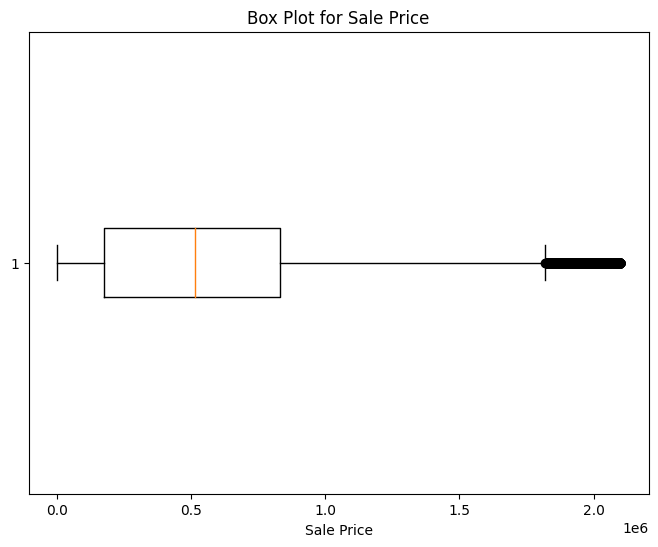

In [32]:
# Menampilkan box plot untuk kolom "Sale Price"
plt.figure(figsize=(8, 6))
plt.boxplot(df_nyc_sales['SALE PRICE'], vert=False)
plt.title('Box Plot for Sale Price')
plt.xlabel('Sale Price')
plt.show()

### Pengukuran Tendensi Central

1. MEAN

In [33]:
print("Sale Price Mean : ", df_nyc_sales['SALE PRICE'].mean())
print("Sale Price Median : ", df_nyc_sales['SALE PRICE'].median())

Sale Price Mean :  570558.4981839159
Sale Price Median :  515000.0


mean > median sehingga, positively skewed atau skewed to the right.

sebagian besar data berada di sisi kiri (nilai yang lebih kecil), tetapi ada beberapa nilai yang sangat besar (outliers di sisi kanan) yang menarik rata-rata ke atas

2. MEDIAN

In [34]:
# GROSS SQUARE FEET
print("Median GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].median())
print("Mean GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].mean())

Median GROSS SQUARE FEET =  1680.0
Mean GROSS SQUARE FEET =  2612.6674429535938


In [35]:
# LAND SQUARE FEET
print("Median LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].median())
print("Mean LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].mean())

Median LAND SQUARE FEET =  2325.0
Mean LAND SQUARE FEET =  2938.0998632595506


3. MODUS

In [36]:
cols = ['BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
for col in cols:
    print("Modus "+col+" = ",df_nyc_sales[col].mode()[0])

Modus BUILDING CLASS CATEGORY =  01 ONE FAMILY DWELLINGS                    
Modus BUILDING CLASS AT PRESENT =  R4
Modus BUILDING CLASS AT TIME OF SALE =  R4


## Probabilty Distribution

### Distribusi GROSS SQUARE FEET

Text(0, 0.5, 'Frekuensi')

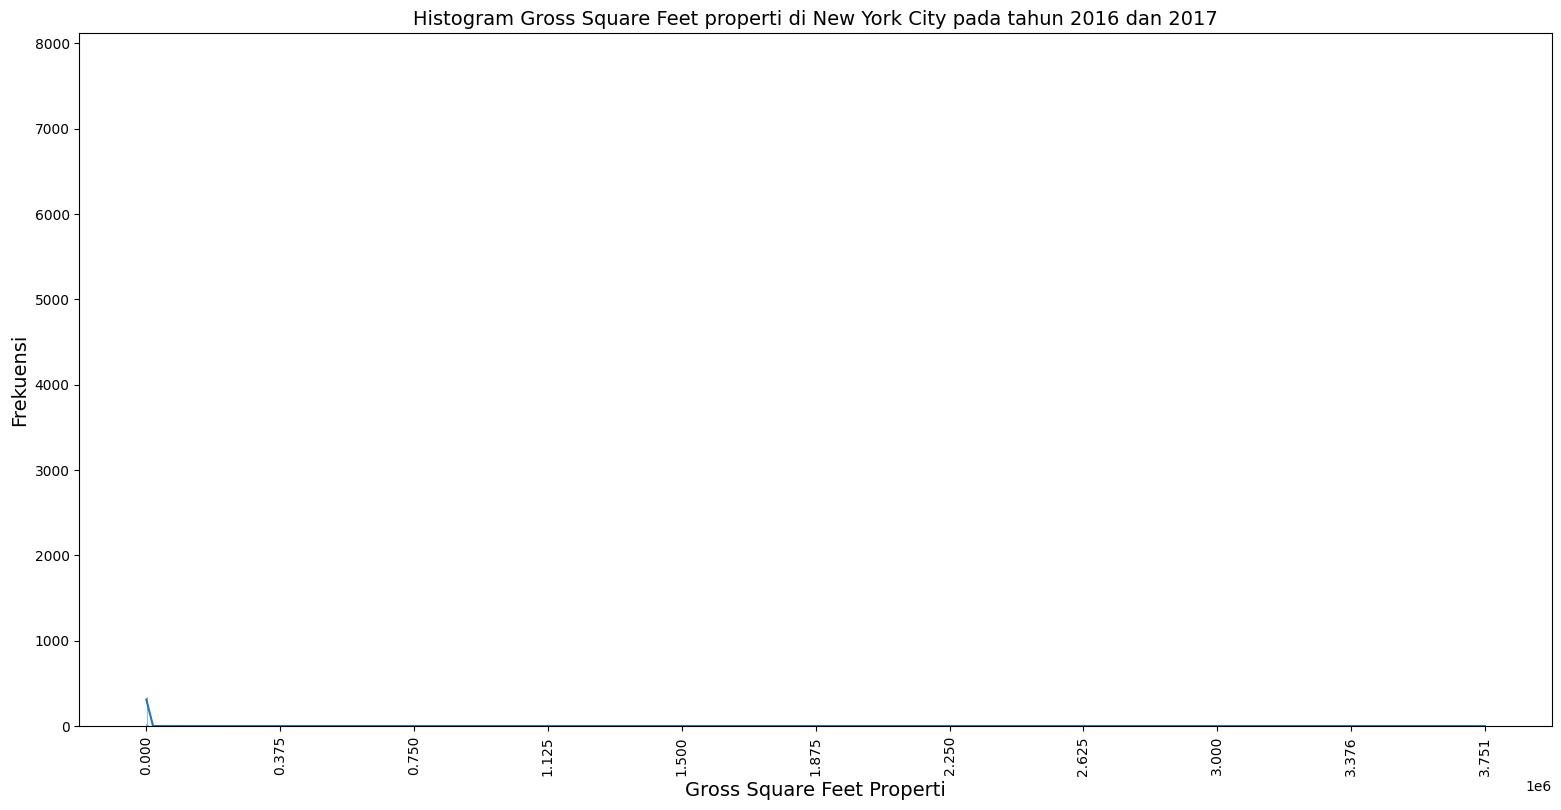

In [38]:
df_gross_square_feet = df_nyc_sales['GROSS SQUARE FEET']
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_gross_square_feet = np.histogram(df_gross_square_feet,bins=10)
sns.histplot(df_gross_square_feet,kde=True, ax=ax)
ax.set_title('Histogram Gross Square Feet properti di New York City pada tahun 2016 dan 2017', fontsize=14)
ax.set_xlabel('Gross Square Feet Properti', fontsize=14)
ax.set_xticks(bin_edge_gross_square_feet)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=14)